<a href="https://colab.research.google.com/github/Sivalakshmi2004/3D-MRI-or-CT-SCAN-IMAGE-FUSION/blob/main/Image_fusion_3D_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 17.4 MB/s eta 0:00:00


In [3]:
!pip install nibabel

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

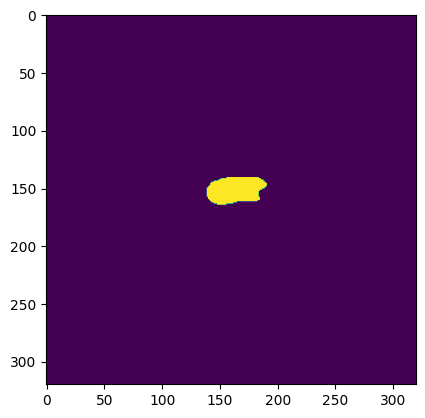

In [5]:
test_load = nib.load('/content/drive/MyDrive/8.nii').get_fdata()
test_load.shape

test = test_load[:,:,59]
plt.imshow(test)
plt.show()

In [6]:
import SimpleITK as sitk

# List of image file paths
image_paths = [
    '/content/drive/MyDrive/3d_images/IMG_0002.nii.gz',
    '/content/drive/MyDrive/3d_images/IMG_0031.nii.gz',
    '/content/drive/MyDrive/3d_images/IMG_0059.nii.gz',
    '/content/drive/MyDrive/3d_images/IMG_0078.nii.gz',
    '/content/drive/MyDrive/3d_images/MASK_0002.nii.gz',
    '/content/drive/MyDrive/3d_images/MASK_0031.nii.gz',
    '/content/drive/MyDrive/3d_images/MASK_0059.nii.gz',
    '/content/drive/MyDrive/3d_images/MASK_0078.nii.gz'
]

image_weights = [0.2, 0.15, 0.1, 0.1, 0.1, 0.1, 0.15, 0.2]

# Initialize the fused image using the first image
fused_image = sitk.ReadImage(image_paths[0])

# Get the pixel type of the fused image
pixel_type = fused_image.GetPixelID()

# Load and resample the remaining images to match the spacing and origin of the fused image
for i in range(1, len(image_paths)):
    current_image = sitk.ReadImage(image_paths[i])
    weight = image_weights[i]

    # Resample the current image to match the spacing and origin of the fused image
    current_image = sitk.Resample(current_image, fused_image, sitk.Transform(), sitk.sitkLinear, 0.0)

    # Cast the pixel type of the current image to match the fused image
    current_image = sitk.Cast(current_image, pixel_type)

    # Scale the current image by its weight
    current_image = sitk.Multiply(current_image, weight)

    # Add the weighted image to the fused image
    fused_image = sitk.Add(fused_image, current_image)
# Save the fused image to a new file
sitk.WriteImage(fused_image, '/content/output_fused_image.nii.gz')

print("Fusion complete. Fused image saved.")


Fusion complete. Fused image saved.


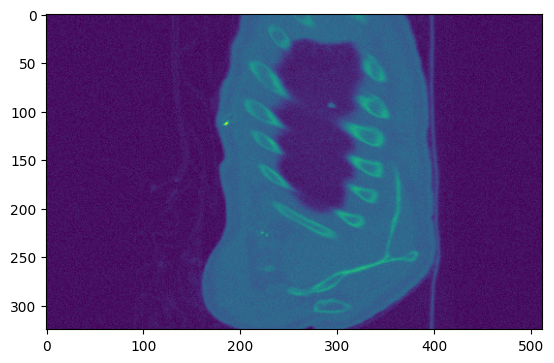

In [10]:
test_load = nib.load('/content/output_fused_image.nii.gz').get_fdata()
test_load.shape

test = test_load[:,:,59]
plt.imshow(test)
plt.show()

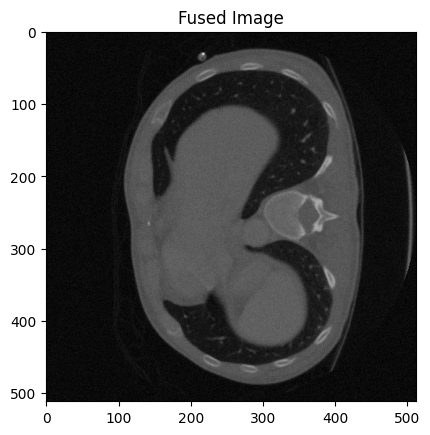

In [14]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load and display the fused image
fused_image = sitk.ReadImage('/content/output_fused_image.nii.gz')

# Extract a 2D slice (for example, the 59th slice) for visualization
fused_slice = sitk.GetArrayFromImage(fused_image)[:, :, 59]

plt.imshow(fused_slice,cmap="gray")
plt.title('Fused Image')
plt.show()


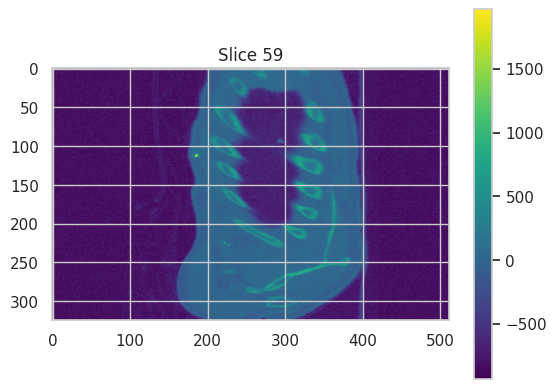

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the NIfTI image
test_load = nib.load('/content/output_fused_image.nii.gz').get_fdata()

# Get the shape of the loaded image
image_shape = test_load.shape

# Choose a specific slice, for example, the 60th slice along the third dimension (assuming 0-based indexing)
slice_number = 59
selected_slice = test_load[:, :, slice_number]

# Display the selected slice using matplotlib
plt.imshow(selected_slice, cmap='viridis')  # You can specify the colormap
plt.title(f"Slice {slice_number}")
plt.colorbar()  # Add a color bar
plt.show()


In [ ]:
import SimpleITK as sitk

In [ ]:
import seaborn as sns

# Load and display the fused image
fused_image = sitk.ReadImage('/content/output_fused_image.nii.gz')

# Set a seaborn style
sns.set(style="whitegrid")

# Create the image plot
plt.figure(figsize=(8, 8))
sns.heatmap(fused_image, cmap='coolwarm', cbar=True, square=True, annot=False, xticklabels=False, yticklabels=False)
plt.title('Fused Image')
plt.show()

In [ ]:
!pip install scikit-learn numpy


In [ ]:
!pip install nibabel


In [ ]:
import numpy as np
import nibabel as nib
from sklearn import svm
import matplotlib.pyplot as plt
# Load your fused image data
fused_image = nib.load('/content/output_fused_image.nii.gz').get_fdata()
# Flatten the 3D image to a 2D representation for the One-Class SVM
fused_image_2d = fused_image.reshape(-1, fused_image.shape[-1])
# Train a One-Class SVM model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(fused_image_2d)
# Predict anomalies on the same data
y_pred = clf.predict(fused_image_2d)
# Reshape the predictions back to the original image shape
y_pred_reshaped = y_pred.reshape(fused_image.shape[:-1])
# Calculate the accuracy of the One-Class SVM model
 accuracy = accuracy_score(y_test, y_pred_mapped)
 print("Accuracy of model:", accuracy)
